In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

start = datetime(2010,1,1)
end = datetime(2020,6,30)

In [4]:
import pandas_datareader as pdr

GL = pdr.DataReader(name = '005930.KS', data_source='yahoo', start=start, end=end)

In [9]:
GL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13192.374023
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13404.367188
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13714.202148
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13257.604492
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13388.059570


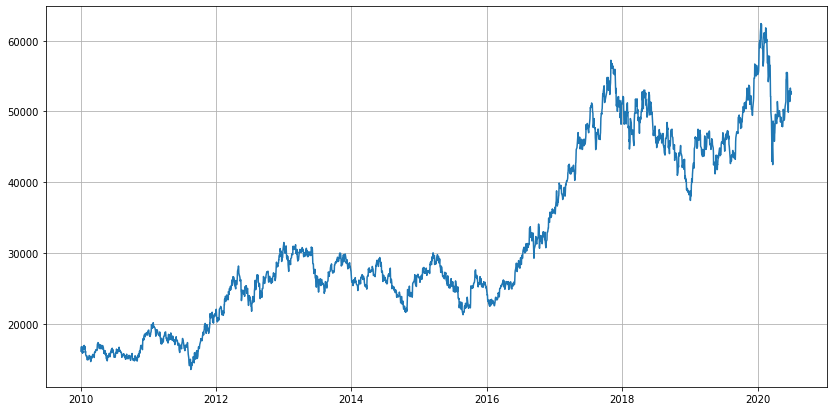

In [6]:
plt.figure(figsize=(14,7))
plt.plot(GL['Close'])
plt.grid()
plt.show()

In [7]:
GL_Trunc = GL[:'2019-12-31']
GL_Trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,52718.402344
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,52243.468750
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,52623.417969
2019-12-27,56900.0,55500.0,55700.0,56500.0,12313056.0,54013.425781
2019-12-30,56600.0,55700.0,56200.0,55800.0,8356767.0,53344.234375


In [10]:
DF = pd.DataFrame({'ds':GL_Trunc.index, 'y':GL_Trunc['Close']})
DF.reset_index(inplace = True)
DF.head()

,Date,ds,y
0,2010-01-04,2010-01-04,16180.0
1,2010-01-05,2010-01-05,16440.0
2,2010-01-06,2010-01-06,16820.0
3,2010-01-07,2010-01-07,16260.0
4,2010-01-08,2010-01-08,16420.0


In [11]:
del DF['Date']
DF.head()

,ds,y
0,2010-01-04,16180.0
1,2010-01-05,16440.0
2,2010-01-06,16820.0
3,2010-01-07,16260.0
4,2010-01-08,16420.0


In [12]:
from fbprophet import Prophet

m = Prophet()
m.fit(DF)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=184)
future.tail()

,ds
2639,2020-06-27
2640,2020-06-28
2641,2020-06-29
2642,2020-06-30
2643,2020-07-01


In [15]:
future_ = GL['2020-1-1':'2020-7-2']
future_.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,52770.640625
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,53057.433594
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,53057.433594
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,53344.234375
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,54300.218750


In [17]:
future_.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-25,53000.0,51900.0,52100.0,51900.0,18541624.0,49982.199219
2020-06-26,53900.0,52200.0,52800.0,53300.0,21575360.0,51330.468750
2020-06-29,53200.0,52000.0,52500.0,52400.0,17776925.0,50801.125000
2020-06-30,53900.0,52800.0,53900.0,52800.0,21157172.0,51188.921875
2020-07-01,53600.0,52400.0,53400.0,52600.0,16706143.0,50995.023438


In [18]:
forecast = m.predict(future)

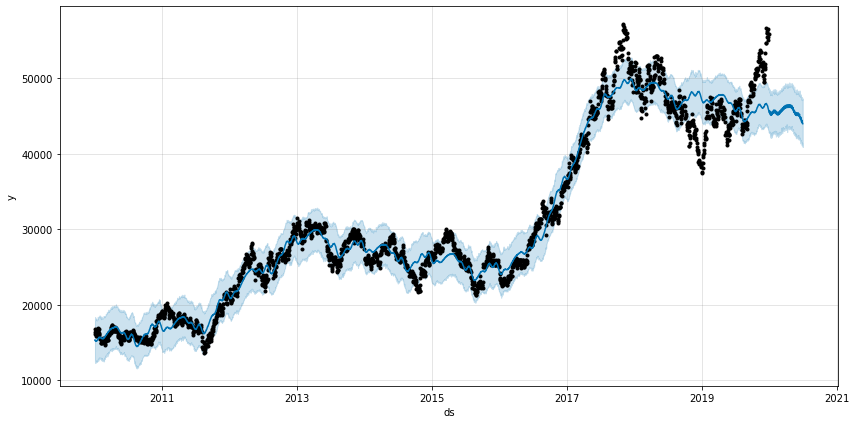

In [21]:
m.plot(forecast, figsize=(12,6));

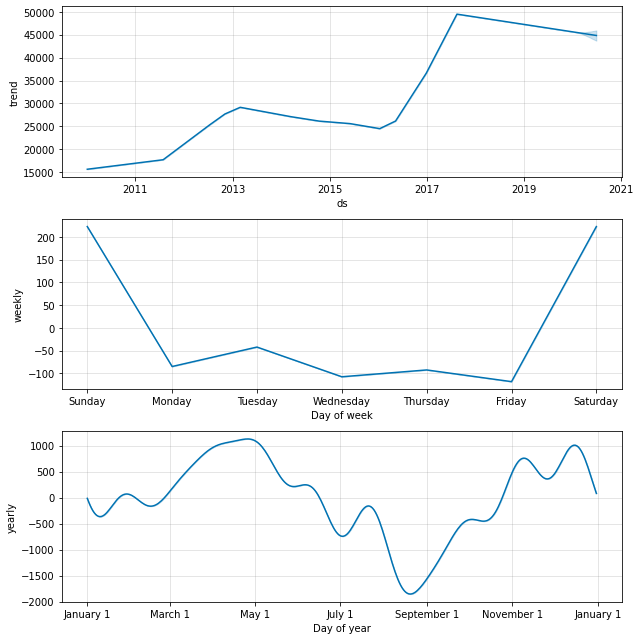

In [22]:
m.plot_components(forecast);

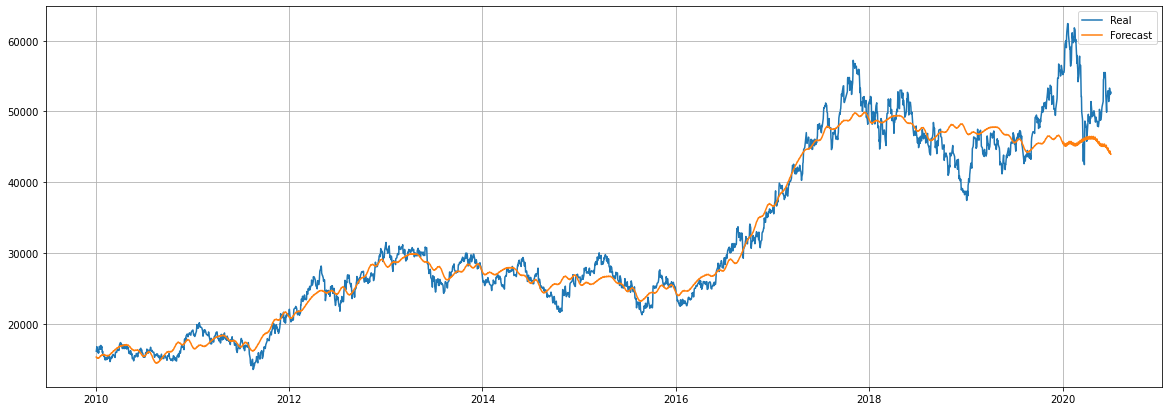

In [24]:
plt.figure(figsize=(20,7))
plt.plot(GL.index, GL['Close'], label='Real')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.grid()
plt.legend()
plt.show()